<a href="https://colab.research.google.com/github/arthireddy14/Machine_Learning/blob/main/bank_marketing_decisiontreec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Business Scenario

A retail bank runs marketing campaigns to sell term deposit plans to customers.
Calling every customer is expensive and inefficient.
The bank wants a rule-based system that can decide:
“Should we contact this customer or not?”
Management prefers a model whose decisions can be:
Clearly explained
Converted into if–else rules
Understood by non-technical staff

In [ ]:
df=pd.read_csv('bank_marketing_dataset.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:

df['deposit']=df['deposit'].map({'yes':1,'no':0})

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [ ]:
# x=df.drop('deposit',axis=1)
# y=df['deposit']

In [ ]:
x=df[['age','job','balance','loan','contact']]
y=df['deposit']
# x.head(),y.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model=DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=50,
    random_state=42
)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=42)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6247201074787282

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.48      0.57      1175
           1       0.58      0.79      0.67      1058

    accuracy                           0.62      2233
   macro avg       0.65      0.63      0.62      2233
weighted avg       0.65      0.62      0.62      2233


Confusion Matrix:
 [[562 613]
 [225 833]]


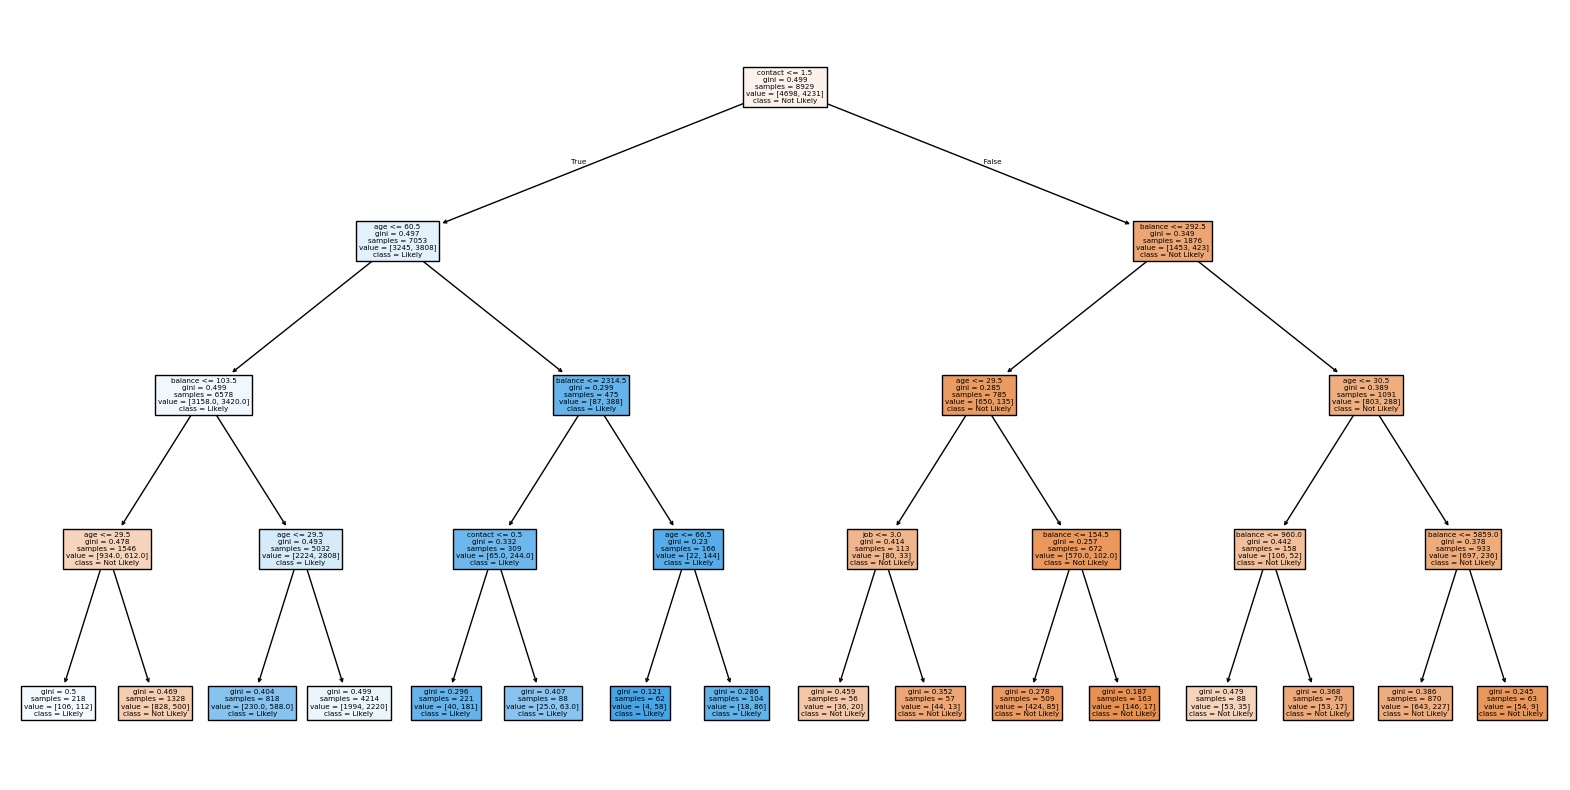

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=x.columns,
    class_names=["Not Likely", "Likely"],
    filled=True
)
plt.show()

In [ ]:
# the customers who has long duration in call are likely to subscribe.
